In [67]:
import pandas as pd
from typing import Tuple, List, Dict
from tabulate import tabulate
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [68]:
df = pd.read_csv('Life Expectancy Data.csv')

In [69]:
def print_df(dataframe: pd.DataFrame):
    print(tabulate(dataframe, headers='keys', tablefmt='psql'))

In [70]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [71]:
df2 = df.copy()

In [72]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

### Continous object data

In [73]:
def numberic(dataframe : pd.DataFrame) : 
    df = dataframe.copy()
    for key in df.keys() : 
        if df[key].dtype == object : 
            df[key] = LabelEncoder().fit_transform(df[key])
    return df

### Normalize data

In [74]:
def normalize(dataframe : pd.DataFrame) : 
    df = dataframe.copy()
    for key in df.keys() : 
        if df[key].dtype != object : 
            min = df[key].min()
            max = df[key].max()
            df[key] = (df[key] - min) / (max - min)
            df[key] = df[key].round(decimals = 4)
    return df

### Call normalize function

In [75]:
# df = normalize(dataframe = df)
# df

### Call continous data function

In [76]:
df = numberic(dataframe = df)
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192,2004,1,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,192,2003,1,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,192,2002,1,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,192,2001,1,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


### Handle non-object missing data 

In [77]:
def replace_Nan_data(dataframe : pd.DataFrame) : 
    df = dataframe.copy()
    for key in df.keys() : 
        if df[key].isnull().sum() > 0 : 
            df[key].fillna(round(df[key].mean()), inplace = True)
    return df

### Call handle non-object missing data

In [78]:
df = replace_Nan_data(dataframe = df)
df.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

### Predict

In [79]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, f1_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split, cross_validate, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np


In [80]:
X = np.array(df.drop('Life expectancy ', axis = 1))
y = df['Life expectancy ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)
model = LinearRegression()
model.fit(X_train, y_train)

#-------------------------------------------
pred = model.predict(X_test)
score = model.score(X_test, y_test)
score


0.797570177697366

In [81]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
print(mse, mae, r2)


17.246814632636625 3.124112813064014 0.797570177697366


In [82]:
df1 = df.copy()
df1 = normalize(dataframe = df)
X = np.array(df1.drop('Life expectancy ', axis = 1))
y = df1['Life expectancy ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)
model = LinearRegression()
model.fit(X_train, y_train)

#-------------------------------------------

pred = model.predict(X_test)

#-------------------------------------------

mse1 = mean_squared_error(y_test, pred)
mae1 = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
print(mse1, mae1, r2)

0.006209704773482686 0.059279811089079856 0.7975762487345248


In [83]:
k_folds = KFold(n_splits = 5)

scores = cross_val_score(model , X_train, y_train, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.78742027 0.85192742 0.81263532 0.8015895  0.82505003]
Average CV Score:  0.8157245083968275
Number of CV Scores used in Average:  5


<AxesSubplot: xlabel='Life expectancy ', ylabel='Count'>

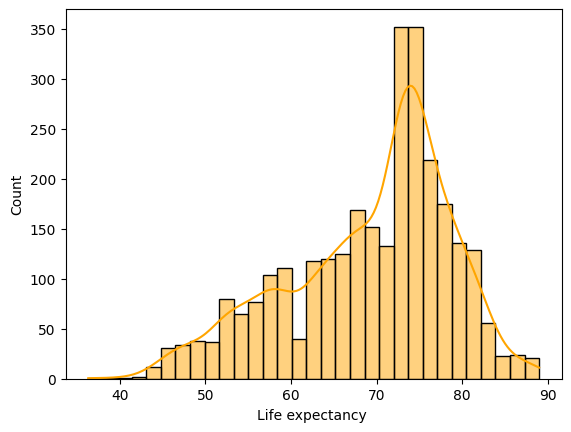

In [84]:
sns.histplot(df['Life expectancy '].dropna(), kde = True, color = 'orange')

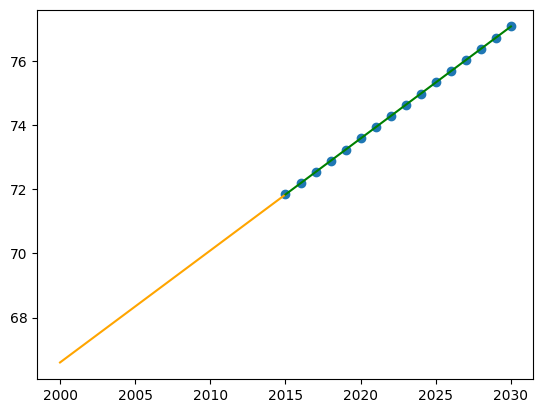

In [88]:
X = df['Year']
X = X.values.reshape(-1, 1)
y = df['Life expectancy ']

# plt.scatter(X, y)

model.fit(X, y)
y_predict = model.predict(X)

plt.plot(X, y_predict, color = 'orange')
# plt.show()

X_future = np.array(range(2015, 2031)).reshape(-1, 1)
y_future = model.predict(X_future)
plt.scatter(X_future, y_future)
plt.plot(X_future, y_future, color = 'green')
plt.show()

In [86]:
national_exp = df1[['Country', 'Life expectancy ']]
# print_df(dataframe = national_exp)

In [87]:
X1 = np.array(df.drop('Life expectancy ', axis = 1))
y1 = df['Life expectancy ']